In [15]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_3/20140320/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_3/20140320/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [2]:
# HLL
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst1", "inst2"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[3.106881947395112, 0.815596104205632, 1.3505614520842948, 6.801731631537726, 1.1331012155641074, 2.1420364061523576, 4.01567754214656, 0.31335649320042597, 1.4020296965074655, 2.3881815939808284, 0.32168622806073005, 1.6603948565211963, 0.2530399456484062, 0.271961678127173, 2.139394704218661, 2.429325428385511, 1.0322381189564263, 2.17219170142772, 0.3394131641554322, 1.8930473533567624, 1.8485467463812866, 0.13774669366939152, 0.7330026076448515, 6.083821948376955, 0.8718123276347141, 1.5442283027783403, 0.6686238644922301, 0.738433630817411, 0.781546639665865, 2.093654705710347, 0.5444192860948321, 2.8000082292673896, 2.2188663897477223, 1.7450707816831317, 2.093536408158872, 2.2088867400434196, 2.174784599011561, 2.3178849196297695, 0.9370958884696462, 1.0273658462008868]
[3.1055218228827153, 0.7636454171071266, 2.0783784888235055, 5.64906900328587, 1.4300116832209293, 1.9404207640300657, 4.374730177003886, 0.8046009310516012, 1.1844368800556349, 1.673813112440661, 0.3093685325974

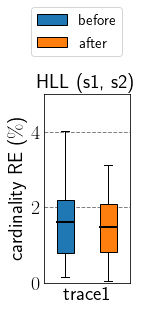

In [4]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("HLL (s1, s2)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("hll.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [5]:
# PCSA
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst6"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.8119104795841957, 0.6407813137586376, 0.6918234437594628, 0.08206109382610947, 0.8669512044978865, 0.01402702833021378, 0.38820787446403476, 0.023373450406389332, 0.5637666850066703, 0.3178940294284097, 1.1526121762736963, 0.921084673895916, 1.9738253593649433, 2.2338870828238244, 0.8819208150958451, 1.8611567356379928, 0.6011446796608543, 1.3221885922580283, 1.5439965851576316, 0.36907584386380854]
[0.6743561333726574, 0.08631420186620391, 0.7217349804799048, 0.8171801384154919, 0.29789201047758107, 0.5013459103975577, 0.5843854997644549, 0.9148844847534804, 1.173247406852052, 0.691358926704081, 0.32448901237269173, 1.4584729394142457, 1.185205950948671, 2.105423005118402, 0.7655908502556921, 0.542376796984112, 0.39372185312346725, 1.2001198646119382, 0.9544741253254395, 0.805032759925866]
20 0.7518669616718292
20 0.7436629153677985


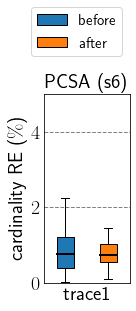

In [6]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("PCSA (s6)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("pcsa.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [7]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst7", "inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[11.695681145947933, 13.730275571714365, 29.272469697676406, 28.339012975490125, 12.060323498944337, 13.309425569411523, 29.271482367220926, 28.438252005874016, 11.14471130705479, 13.394387355830698, 29.6790695303225, 28.60564891693119, 11.685547223930305, 13.627950477168142, 29.448607456728247, 28.719679216602557, 11.674720039919286, 12.708337132144099, 29.603223029532643, 28.669559031642837, 12.169294627038331, 14.97107048887062, 29.901975544949206, 28.674825488892242, 7.960654067819852, 8.794927839867476, 31.214561369709575, 30.769757490517787, 8.152613086761825, 15.802754322517428, 31.372506382428867, 25.866146816386916, 17.777999798436376, 18.291626742845914, 23.928577471812662, 24.30790939747253, 17.50064375242893, 19.62789006245447, 24.209283303996965, 23.318664769295527]
[12.105100814841819, 13.76928290415534, 28.92691386741551, 28.284455251403173, 12.470855741485956, 13.752131385038371, 28.93960017477451, 28.111542376355736, 11.487575541854275, 13.628381554301816, 29.346950568

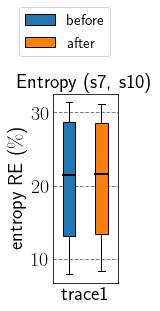

In [8]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s7, s10)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [9]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst3"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.5411803905220438, 0.5576518332633147, 0.5739007186582413, 0.564550725621967, 0.6190559796492567, 0.575708982470618, 0.5750198137787278, 0.5438259100312338, 0.48626652272136217, 0.501834639462267]
[0.4880096350778529, 0.5276242048986259, 0.4973060484212899, 0.5293520055061937, 0.3747690002509873, 0.46359588296803744, 0.48389263641656627, 0.4985330559748446, 0.47262694573661307, 0.5158921950863249]
10 0.5611012794426409
10 0.4926578417495714


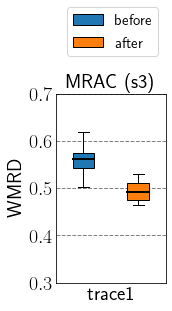

In [10]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s3)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [11]:
# UnivMon
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst4", "inst5"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[12.901390492175649, 7.006588625092109, 7.3674267197260015, 8.290084229399188, 2.087823449778899, 0.9166404262127568, 2.8825485922791496, 2.8812117433894437, 3.3027229094392645, 9.112931201976448, 0.31937311426690773, 3.212975770407152, 2.8722515609779946, 2.1991909759733828, 10.529356562404256, 4.210380807018363, 8.422722786785272, 1.8396748534636669, 0.08706130076757146, 5.473737124083096, 11.2242417711816, 8.898730269564, 1.7834424572678218, 10.090444102443737, 6.99613902774407, 5.441853089583377, 0.06782958836946167, 9.847152247082658, 0.6709355596985203, 8.082216667705296, 0.20533946307754464, 3.884141453681374, 4.5074617468503755, 0.005055948619971706, 4.902806795653133, 6.1239909617229555, 0.18244460919506408, 1.3039879028408765, 1.7775199177730412, 1.2491668722113567]
[14.609819778159459, 1.754650060001417, 7.746514366406696, 4.646037453575827, 4.263408068875683, 0.5176900937916118, 2.2902412838056345, 2.211957764097491, 6.510421484478833, 9.041714410522045, 3.2348056481289773,

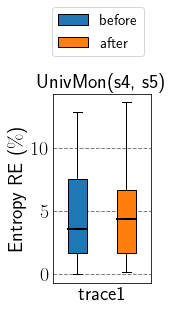

In [12]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("UnivMon(s4, s5)", fontsize = 20)
plt.ylabel("Entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("UnivMon.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [13]:
# LinearCounting
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst9"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.8606699093204775, 0.36662928087123586, 1.813614562808182, 2.382945391154765, 1.8878677531069663, 0.41097574090860206, 0.5725306550442617, 0.07719779303907187, 0.5784616234201025, 2.793565369473867, 1.2087201806386476, 1.868352913253739, 0.03492417303258236, 0.7869255350667268, 2.770410204031427, 0.5497592777130782, 1.343964452322345, 0.8541513379770075, 1.2160923152194019, 0.953764431422722]
[0.47400989613375866, 1.9660919705097681, 3.286738971166945, 1.0911635745604638, 1.3663507786085052, 2.0364977026400366, 1.045913106927018, 0.3900704347905733, 1.7486461885569005, 1.0607541493267216, 2.2687792369057234, 3.751703739674096, 0.32853560858053116, 1.5700007328960388, 2.360211197942428, 1.570693066170774, 1.8003501167969467, 0.3481862314462332, 1.6426626957351265, 1.179148739046133]
20 1.0812423060306848
20 1.5703468995334064


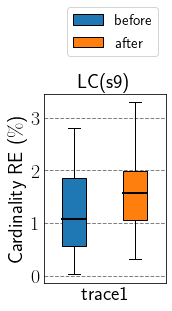

In [14]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("LC(s9)", fontsize = 20)
plt.ylabel("Cardinality RE ($\%$)", fontsize = 20)
# plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("LC.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()
